In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np

In [3]:
df =  pd.read_csv(r"G:\fresh_start\paper\code_paper\main_data\final_data\1962_lapse_station_data.csv")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1648\3479638074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = (df['year'] // 10) * 10  # Group by decade
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1648\3479638074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = (df['year'] // 10) * 10  # Group by decade
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1648\3479638074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

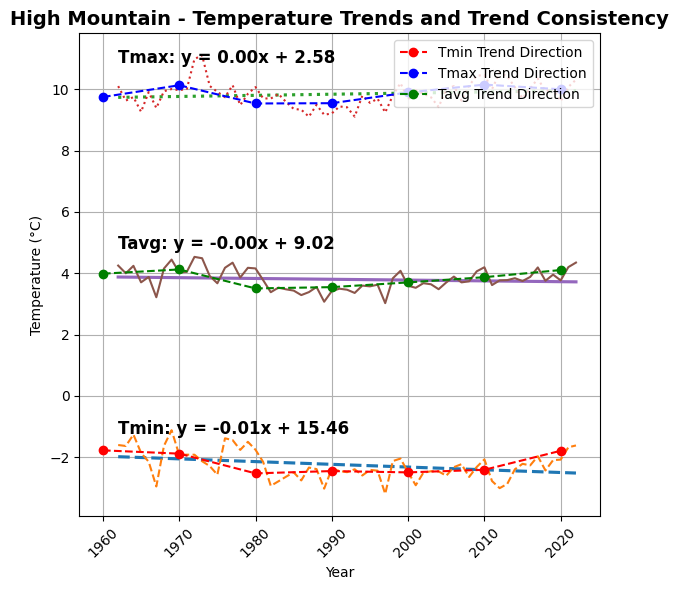

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1648\3479638074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = (df['year'] // 10) * 10  # Group by decade
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1648\3479638074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = (df['year'] // 10) * 10  # Group by decade
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1648\3479638074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

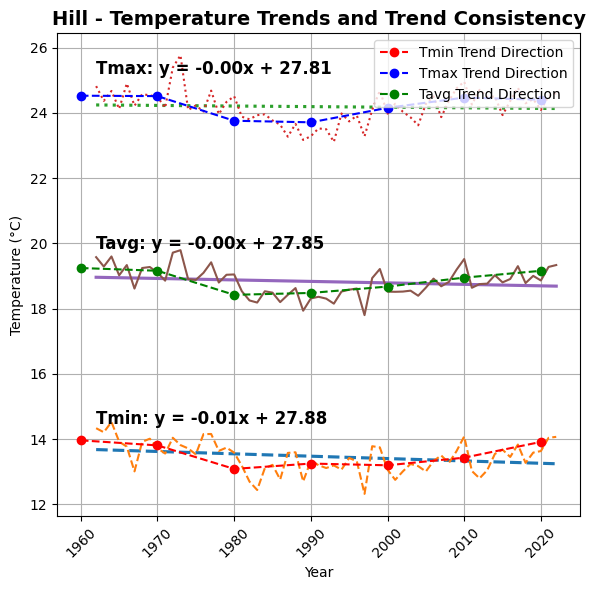

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1648\3479638074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = (df['year'] // 10) * 10  # Group by decade
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1648\3479638074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = (df['year'] // 10) * 10  # Group by decade
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1648\3479638074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

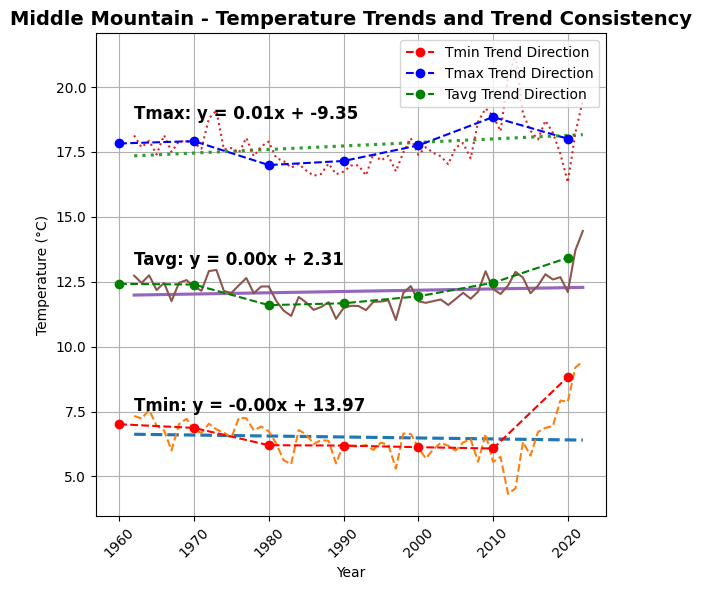

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1648\3479638074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = (df['year'] // 10) * 10  # Group by decade
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1648\3479638074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = (df['year'] // 10) * 10  # Group by decade
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1648\3479638074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

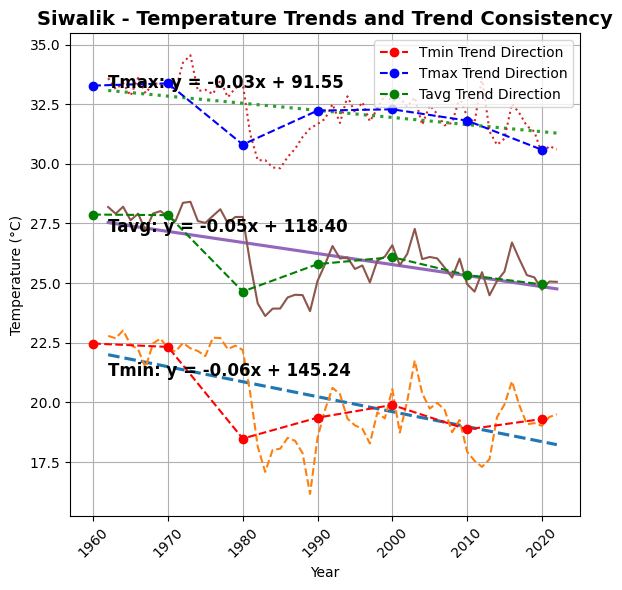

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1648\3479638074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = (df['year'] // 10) * 10  # Group by decade
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1648\3479638074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = (df['year'] // 10) * 10  # Group by decade
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1648\3479638074.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

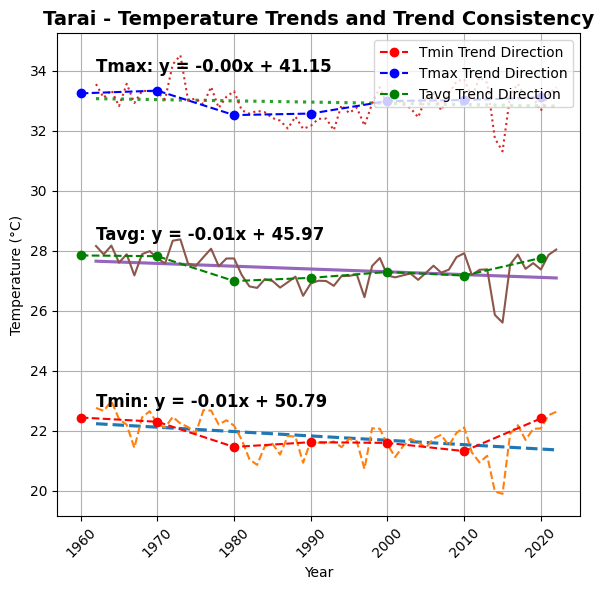

In [6]:


# Convert 'date' to datetime and extract year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df["Tavg"] = (df["Tmax"] + df["Tmin"]) * 0.5

# Aggregate annual Tmin, Tmax, and Tavg for each region
annual_data = df.groupby(['year', 'regions']).agg({
    'Tmin': 'mean',
    'Tmax': 'mean',
    'Tavg': 'mean'
}).reset_index()

# List of regions
regions = annual_data['regions'].unique()

# Function to calculate trend direction consistency
def trend_direction(df, temp_col):
    df['decade'] = (df['year'] // 10) * 10  # Group by decade
    df_decade_mean = df.groupby('decade')[temp_col].mean().reset_index()

    # Calculate slope for trend direction consistency
    df_decade_mean['slope'] = np.sign(df_decade_mean[temp_col].diff())
    return df_decade_mean

# Set up the plot for each region
for region in regions:
    region_data = annual_data[annual_data['regions'] == region]

    # Calculate regression for Tmin
    slope_Tmin, intercept_Tmin, _, _, _ = linregress(region_data['year'], region_data['Tmin'])
    equation_Tmin = f'Tmin: y = {slope_Tmin:.2f}x + {intercept_Tmin:.2f}'

    # Calculate regression for Tmax
    slope_Tmax, intercept_Tmax, _, _, _ = linregress(region_data['year'], region_data['Tmax'])
    equation_Tmax = f'Tmax: y = {slope_Tmax:.2f}x + {intercept_Tmax:.2f}'

    # Calculate regression for Tavg
    slope_Tavg, intercept_Tavg, _, _, _ = linregress(region_data['year'], region_data['Tavg'])
    equation_Tavg = f'Tavg: y = {slope_Tavg:.2f}x + {intercept_Tavg:.2f}'

    # Calculate trend consistency for Tmin, Tmax, and Tavg
    trend_Tmin = trend_direction(region_data, 'Tmin')
    trend_Tmax = trend_direction(region_data, 'Tmax')
    trend_Tavg = trend_direction(region_data, 'Tavg')

    plt.figure(figsize=(6, 6))

    # Plotting Tmin with trendline (dashed line)
    #sns.regplot(data=region_data, x='year', y='Tmin', scatter=False, label='Tmin', ci=None, line_kws={'linestyle': '--'})
    sns.regplot(data=region_data, x='year', y='Tmin', scatter=False, ci=None, line_kws={'linestyle': '--'})
    sns.lineplot(data=region_data, x='year', y='Tmin', linestyle='--')

    # Plotting Tmax with trendline (dotted line)
    #sns.regplot(data=region_data, x='year', y='Tmax', scatter=False, label='Tmax', ci=None, line_kws={'linestyle': ':'})
    sns.regplot(data=region_data, x='year', y='Tmax', scatter=False, ci=None, line_kws={'linestyle': ':'})
    sns.lineplot(data=region_data, x='year', y='Tmax', linestyle=':')

    # Plotting Tavg with trendline (solid line)
    #sns.regplot(data=region_data, x='year', y='Tavg', scatter=False, label='Tavg', ci=None, line_kws={'linestyle': '-'})
    sns.regplot(data=region_data, x='year', y='Tavg', scatter=False, ci=None, line_kws={'linestyle': '-'})
    sns.lineplot(data=region_data, x='year', y='Tavg', linestyle='-')

    # Plot trend consistency markers for Tmin, Tmax, and Tavg
    plt.plot(trend_Tmin['decade'], trend_Tmin['Tmin'], 'ro--', label='Tmin Trend Direction', markersize=6)
    plt.plot(trend_Tmax['decade'], trend_Tmax['Tmax'], 'bo--', label='Tmax Trend Direction', markersize=6)
    plt.plot(trend_Tavg['decade'], trend_Tavg['Tavg'], 'go--', label='Tavg Trend Direction', markersize=6)

    # Add equations to the plot
    plt.text(region_data['year'].min(), region_data['Tmin'].mean() + 1, equation_Tmin, color='black', fontsize=12, ha='left', fontweight='bold')
    plt.text(region_data['year'].min(), region_data['Tmax'].mean() + 1, equation_Tmax, color='black', fontsize=12, ha='left', fontweight='bold')
    plt.text(region_data['year'].min(), region_data['Tavg'].mean() + 1, equation_Tavg, color='black', fontsize=12, ha='left', fontweight='bold')

    plt.title(f'{region} - Temperature Trends and Trend Consistency', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


      Decade  Tavg_High_Mountain_Monsoon  Tavg_High_Mountain_Postmonsoon  \
0  1962-1971                       0.025                          -0.058   
1  1972-1981                      -0.043                          -0.083   
2  1982-1991                      -0.074                           0.070   
3  1992-2001                       0.001                           0.071   
4  2002-2011                       0.002                           0.029   
5  2012-2021                       0.034                           0.135   

   Tavg_High_Mountain_Winter  Sign_Tavg_High_Mountain_Monsoon  \
0                     -0.015                              1.0   
1                     -0.028                             -1.0   
2                      0.073                             -1.0   
3                      0.067                              1.0   
4                      0.033                              1.0   
5                      0.031                              1.0   

   Sign_Tav

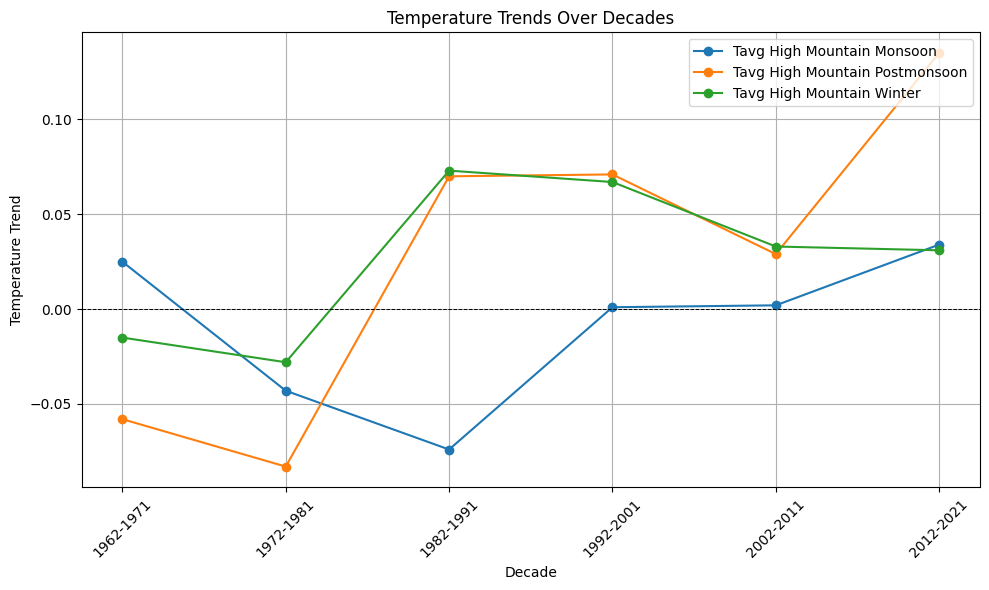

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Example DataFrame with decadal trend data for different regions and seasons
data = {
    'Decade': ['1962-1971', '1972-1981', '1982-1991', '1992-2001', '2002-2011', '2012-2021'],
    'Tavg_High_Mountain_Monsoon': [0.025, -0.043, -0.074, 0.001, 0.002, 0.034],
    'Tavg_High_Mountain_Postmonsoon': [-0.058, -0.083, 0.070, 0.071, 0.029, 0.135],
    'Tavg_High_Mountain_Winter': [-0.015, -0.028, 0.073, 0.067, 0.033, 0.031]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Add a column to calculate the sign of the trend (1 for positive, -1 for negative)
for col in df.columns[1:]:
    df[f'Sign_{col}'] = np.sign(df[col])

# Print the DataFrame with the sign of each trend
print(df)

# Visualization - Trend over time for each region/season
regions_seasons = df.columns[1:4]  # Select columns with trend data

plt.figure(figsize=(10, 6))

# Plot each region/season trend over decades
for col in regions_seasons:
    plt.plot(df['Decade'], df[col], marker='o', label=col.replace('_', ' '))

plt.axhline(0, color='black', linestyle='--', linewidth=0.7)  # Horizontal line at y=0 for reference
plt.title('Temperature Trends Over Decades')
plt.xlabel('Decade')
plt.ylabel('Temperature Trend')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Convert 'date' to datetime and extract year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df["Tavg"] = (df["Tmax"] + df["Tmin"]) * 0.5

# Aggregate annual Tmin and Tmax for each region
annual_data = df.groupby(['year', 'regions']).agg({
    'Tmin': 'mean',
    'Tmax': 'mean',
    'Tavg' : "mean"
}).reset_index()

# List of regions
regions = annual_data['regions'].unique()

# Set up the plot for each region
for region in regions:
    region_data = annual_data[annual_data['regions'] == region]

     # Calculate regression for Tmin
    slope_Tmin, intercept_Tmin, _, _, _ = linregress(region_data['year'], region_data['Tmin'])
    equation_Tmin = f'Tmin: y = {slope_Tmin:.2f}x + {intercept_Tmin:.2f}'

    # Calculate regression for Tmax
    slope_Tmax, intercept_Tmax, _, _, _ = linregress(region_data['year'], region_data['Tmax'])
    equation_Tmax = f'Tmax: y = {slope_Tmax:.2f}x + {intercept_Tmax:.2f}'

    # Calculate regression for Tmax
    slope_Tavg, intercept_Tavg, _, _, _ = linregress(region_data['year'], region_data['Tavg'])
    equation_Tavg = f'Tavg: y = {slope_Tavg:.2f}x + {intercept_Tavg:.2f}'

    plt.figure(figsize=(6, 6))
        
    # Plotting Tmin with trendline (dashed line)
    sns.regplot(data=region_data, x='year', y='Tmin', scatter=False, label='Tmin', ci=None, line_kws={'linestyle': '--'})

    sns.lineplot(data=region_data, x='year', y='Tmin', linestyle='--')

    # Plotting Tmax with trendline (dotted line)
    sns.regplot(data=region_data, x='year', y='Tmax', scatter=False, label='Tmax', ci=None, line_kws={'linestyle': ':'})

    sns.lineplot(data=region_data, x='year', y='Tmax', linestyle=':')

    # Plotting Tavg with trendline (solid line)
    sns.regplot(data=region_data, x='year', y='Tavg', scatter=False, label='Tavg', ci=None, line_kws={'linestyle': '-'})

    sns.lineplot(data=region_data, x='year', y='Tavg', linestyle='-')

    plt.text(region_data['year'].min(), region_data['Tmin'].mean() + 1, equation_Tmin, color='black', fontsize=12, ha='left', fontweight='bold')
    plt.text(region_data['year'].min(), region_data['Tmax'].mean() + 1, equation_Tmax, color='black', fontsize=12, ha='left', fontweight='bold')
    plt.text(region_data['year'].min(), region_data['Tavg'].mean() + 1, equation_Tavg, color='black', fontsize=12, ha='left', fontweight='bold')

    plt.title(region, fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend(loc='upper right')
    plt.grid(True)
   
    plt.show()

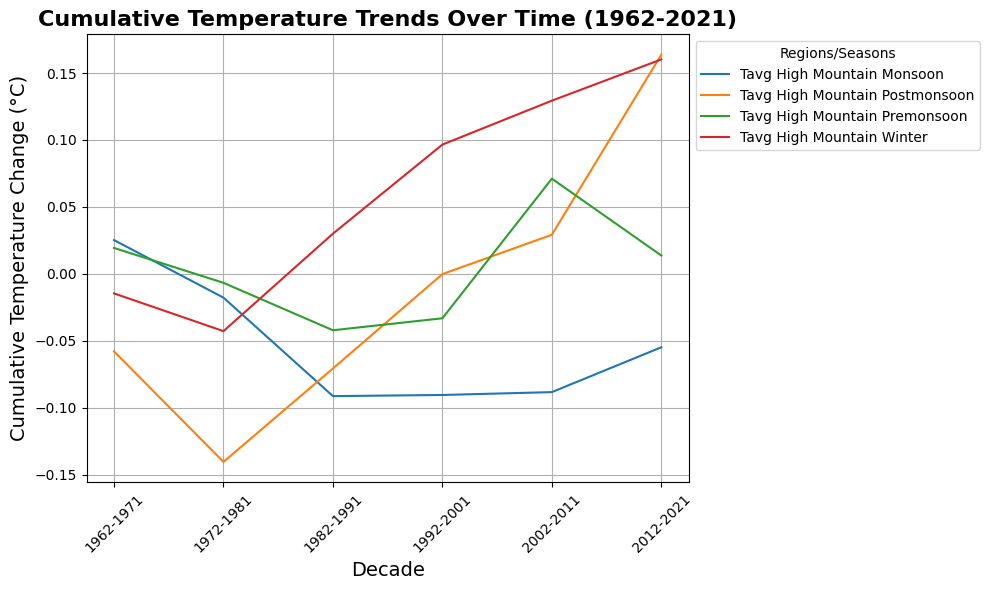

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (assuming it's already loaded in the format shown)
data = {
    'Period': ['1962-1971', '1972-1981', '1982-1991', '1992-2001', '2002-2011', '2012-2021'],
    'Tavg High Mountain Monsoon': [0.025195464, -0.043016788, -0.073591079, 0.00085698, 0.002134045, 0.033520552],
    'Tavg High Mountain Postmonsoon': [-0.057980444, -0.082583394, 0.069806781, 0.070519538, 0.029406644, 0.134569757],
    'Tavg High Mountain Premonsoon': [0.019327085, -0.026063328, -0.035453481, 0.008954256, 0.104330945, -0.057445687],
    'Tavg High Mountain Winter': [-0.014643314, -0.028204835, 0.072847665, 0.066549493, 0.032823677, 0.030839185]
    # Add more regions and seasons as needed
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set the 'Period' as index
df.set_index('Period', inplace=True)

# Cumulative sum for each column (region/season)
cumulative_trend = df.cumsum()

# Plot the cumulative trends
plt.figure(figsize=(10, 6))

# Loop through each column (season) and plot cumulative trend
for column in cumulative_trend.columns:
    plt.plot(cumulative_trend.index, cumulative_trend[column], label=column)

# Customize plot
plt.title('Cumulative Temperature Trends Over Time (1962-2021)', fontsize=16, fontweight='bold')
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Cumulative Temperature Change (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Regions/Seasons")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
